### 這堂課目標
<li>Convolutional Neural Network (CNN)</li>

- <a href="https://medium.com/jameslearningnote/資料分析-機器學習-第5-1講-卷積神經網絡介紹-convolutional-neural-network-4f8249d65d4f">中文介紹（基本）</a>

- <a href="https://towardsdatascience.com/understanding-cnn-convolutional-neural-network-69fd626ee7d4">英文介紹（深入）</a>

In [4]:
%pip install tqdm

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 78 kB 928 kB/s             
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F
import sklearn.model_selection
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [6]:
transformer = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
#      torchvision.transforms.Normalize((0.5,), (0.5,)),
    ])
trainSet = torchvision.datasets.MNIST(root='./data',train=True,download=True,transform=transformer)
testSet = torchvision.datasets.MNIST(root='./data',train=False,download=True,transform=transformer)

31.0%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



102.8%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



112.7%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [7]:
# trainSet = torchvision.datasets.MNIST(root='./mnistdata',train=True,download=True)
# testSet = torchvision.datasets.MNIST(root='./mnistdata',train=False,download=True)

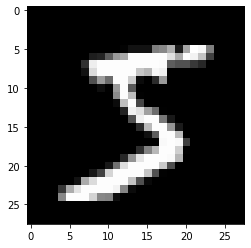

In [8]:
plt.imshow(trainSet.data[0],cmap='gray')


In [9]:
trainLoader = torch.utils.data.DataLoader(trainSet, batch_size=1000, shuffle=True)
testLoader = torch.utils.data.DataLoader(testSet, batch_size=1000, shuffle=False)

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=2, stride=1)
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size=2, stride=1)
        self.fc1 = nn.Linear(1152, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x,2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        output = F.log_softmax(x, dim=1)
        return output


In [11]:
model = Net()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.NLLLoss()

In [12]:
 # Run the training loop
for epoch in range(0, 3):
    # Print epoch
    print(f'Starting epoch {epoch+1}')

    # Set current loss value
    current_loss = []

    # Iterate over the DataLoader for training data
    for data,targets in tqdm(trainLoader):

        optimizer.zero_grad()
        outputs = model(data)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()

        # Print statistics
        current_loss.append(loss.item())
#         if len(current_loss)%10:
#             print(len(current_loss),str(np.round(np.mean(current_loss),3)) )
    print('loss after epoch:' + str(np.round(np.mean(current_loss),3)))
    current_loss = []

# Process is complete.
print('Training process has finished.')

Starting epoch 1


100%|███████████████████████████████████████████| 60/60 [00:07<00:00,  7.59it/s]


loss after epoch:1.241
Starting epoch 2


100%|███████████████████████████████████████████| 60/60 [00:06<00:00,  8.67it/s]


loss after epoch:0.362
Starting epoch 3


100%|███████████████████████████████████████████| 60/60 [00:07<00:00,  7.55it/s]

loss after epoch:0.238
Training process has finished.


In [23]:
test_losses = []
model.eval()
test_loss = 0
correct = 0
for data, target in testLoader:
    output = model(data)
    test_loss = loss_function(output,target)
    pred = output.data.max(1, keepdim=True)[1]
    correct += pred.eq(target.data.view_as(pred)).sum()
    test_losses.append(test_loss)
    print('Test set{:}/{:.0f}: Avg. loss: {:.4f}, Accuracy: {:.2f}%)'.format(
        len(test_losses),testLoader.dataset.data.shape[0]/testLoader.batch_size,
    test_loss, 100.*(correct / (len(test_losses)*testLoader.batch_size))))

Test set1/10: Avg. loss: 0.0000, Accuracy: 96.00%)
Test set2/10: Avg. loss: 0.0000, Accuracy: 95.70%)
Test set3/10: Avg. loss: 0.0000, Accuracy: 95.43%)


c:\program files\python36\lib\site-packages\tqdm\_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


Test set4/10: Avg. loss: 0.0000, Accuracy: 95.38%)
Test set5/10: Avg. loss: 0.0000, Accuracy: 95.52%)
Test set6/10: Avg. loss: 0.0000, Accuracy: 95.90%)
Test set7/10: Avg. loss: 0.0000, Accuracy: 96.00%)
Test set8/10: Avg. loss: 0.0000, Accuracy: 96.35%)
Test set9/10: Avg. loss: 0.0000, Accuracy: 96.66%)
Test set10/10: Avg. loss: 0.0000, Accuracy: 96.63%)


# 作業
按照上述流程載入 torchvision.datasets.cifar.CIFAR10，並用上述CNN方法針對testing_data正確率
（50%>>70分,60%>>80分,70%>>85分,80%>>90分,90%>>100分）


資料說明：https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
trainSet = torchvision.datasets.cifar.CIFAR10(root='./data',train=True,download=True,transform=transformer)
testSet = torchvision.datasets.cifar.CIFAR10(root='./data',train=False,download=True,transform=transformer)

170500096/170498071 [==============================] - 354s 2us/step
